In [1]:
import numpy as np
import pandas as pd

In [4]:
fruit_info = {'fruit':['apple','banana','orange','raspberry'],
             'color':['red','yellow','orange','pink'],
             'weight':[120,150,250,15]}
fruit_info

{'color': ['red', 'yellow', 'orange', 'pink'],
 'fruit': ['apple', 'banana', 'orange', 'raspberry'],
 'weight': [120, 150, 250, 15]}

In [7]:
f_df = pd.DataFrame(data = fruit_info)
f_df

,color,fruit,weight
0,red,apple,120
1,yellow,banana,150
2,orange,orange,250
3,pink,raspberry,15


In [11]:
f_df.index

RangeIndex(start=0, stop=4, step=1)

In [14]:
f_df.index =['zero','one','two','three']
f_df

,color,fruit,weight
zero,red,apple,120
one,yellow,banana,150
two,orange,orange,250
three,pink,raspberry,15


In [16]:
f_df.iloc[0:1,2:]

,weight
zero,120


In [19]:
f_df.loc['zero':'zero','weight':]

,weight
zero,120


## back to the wind question!

In [20]:
caiso_data_stack = pd.read_csv('CAISO_2017to2018_stack.csv', index_col=0)

In [23]:
caiso_data_stack.head(10)

,Source,MWh
2017-08-29 00:00:00,GEOTHERMAL,1181
2017-08-29 00:00:00,BIOMASS,340
2017-08-29 00:00:00,BIOGAS,156
2017-08-29 00:00:00,SMALL HYDRO,324
2017-08-29 00:00:00,WIND TOTAL,1551
2017-08-29 00:00:00,SOLAR PV,0
2017-08-29 00:00:00,SOLAR THERMAL,0
2017-08-29 01:00:00,GEOTHERMAL,1182
2017-08-29 01:00:00,BIOMASS,338
2017-08-29 01:00:00,BIOGAS,156


In [24]:
caiso_data_stack.shape

(61320, 2)

In [25]:
caiso_data_stack.size

122640

In [30]:
caiso_data_stack.describe()

,MWh
count,61320.000000
mean,975.185339
std,1758.685263
min,0.000000
25%,228.000000
50%,349.000000
75%,937.000000
max,10102.000000


## Logical indexing

In [34]:
log_series = (caiso_data_stack['Source'] == 'WIND TOTAL')

In [37]:
caiso_data_stack.loc[log_series,:].head()

,Source,MWh
2017-08-29 00:00:00,WIND TOTAL,1551
2017-08-29 01:00:00,WIND TOTAL,1556
2017-08-29 02:00:00,WIND TOTAL,1325
2017-08-29 03:00:00,WIND TOTAL,1158
2017-08-29 04:00:00,WIND TOTAL,1209


In [48]:
wind = caiso_data_stack.loc[caiso_data_stack['Source'] == 'WIND TOTAL',:]

In [49]:
type(wind)

pandas.core.frame.DataFrame

In [50]:
windex = pd.to_datetime(wind.index)

In [51]:
type(windex)

pandas.core.indexes.datetimes.DatetimeIndex

In [53]:
windex.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', length=8760)

In [60]:
wind_ave = []
for i in range(0,24):
    wind_ave.append(np.mean(wind.loc[windex.hour == i,:]))
wind_ave

[MWh    2173.268493
 dtype: float64, MWh    2120.778082
 dtype: float64, MWh    2051.832877
 dtype: float64, MWh    1973.969863
 dtype: float64, MWh    1881.463014
 dtype: float64, MWh    1772.484932
 dtype: float64, MWh    1646.630137
 dtype: float64, MWh    1490.194521
 dtype: float64, MWh    1363.40274
 dtype: float64, MWh    1290.512329
 dtype: float64, MWh    1250.408219
 dtype: float64, MWh    1247.643836
 dtype: float64, MWh    1308.287671
 dtype: float64, MWh    1412.410959
 dtype: float64, MWh    1561.60274
 dtype: float64, MWh    1726.652055
 dtype: float64, MWh    1878.441096
 dtype: float64, MWh    2005.934247
 dtype: float64, MWh    2109.093151
 dtype: float64, MWh    2181.361644
 dtype: float64, MWh    2229.408219
 dtype: float64, MWh    2231.687671
 dtype: float64, MWh    2220.109589
 dtype: float64, MWh    2216.526027
 dtype: float64]

In [61]:
import matplotlib.pyplot as plt

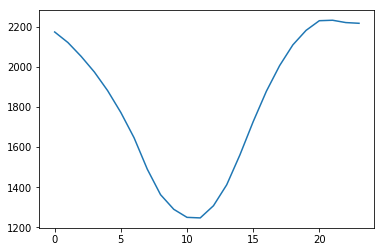

In [62]:
plt.plot(wind_ave)

In [63]:
wind_min = []
wind_max = []
for i in range(0,24):
    wind_min.append(np.min(wind.loc[windex.hour == i,:]))
    wind_max.append(np.max(wind.loc[windex.hour == i,:]))

In [70]:
df_wind = pd.DataFrame(data = wind_ave)
df_wind.columns = ['Av Mwh']

In [75]:
df_wind['min mwh'] = pd.DataFrame(wind_min)['MWh']
df_wind['max mwh'] = pd.DataFrame(wind_max)['MWh']
df_wind

,Av Mwh,min mwh,max mwh
0,2173.268493,49,4795
1,2120.778082,33,4678
2,2051.832877,33,4696
3,1973.969863,36,4537
4,1881.463014,25,4377
5,1772.484932,17,4223
6,1646.630137,15,4161
7,1490.194521,29,3873
8,1363.402740,6,3905
9,1290.512329,10,3904


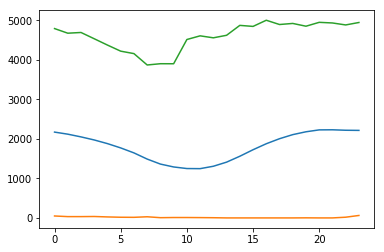

In [77]:
plt.plot(df_wind)

## Look at Lecture 4 notebook for info on row and col labels

## Merging

In [79]:
f_df

,color,fruit,weight
zero,red,apple,120
one,yellow,banana,150
two,orange,orange,250
three,pink,raspberry,15


In [83]:
price_df = pd.DataFrame({'price':[0.5, 0.65, 1, 0.15],
                        'frut':['apple','banana','orange','rasberry']})
price_df

,frut,price
0,apple,0.50
1,banana,0.65
2,orange,1.00
3,rasberry,0.15


In [85]:
pd.merge(f_df,price_df)

MergeError: No common columns to perform merge on

In [86]:
pd.merge(f_df, price_df, left_on='fruit', right_on = 'frut')

,color,fruit,weight,frut,price
0,red,apple,120,apple,0.50
1,yellow,banana,150,banana,0.65
2,orange,orange,250,orange,1.00


In [89]:
price_df.columns[0] = 'fruit'

TypeError: Index does not support mutable operations

In [92]:
price_df.columns = ['fruit','price']
price_df

,fruit,price
0,apple,0.50
1,banana,0.65
2,orange,1.00
3,rasberry,0.15


In [94]:
pd.merge(price_df,f_df)

,fruit,price,color,weight
0,apple,0.50,red,120
1,banana,0.65,yellow,150
2,orange,1.00,orange,250


In [96]:
price_df.loc[3,'fruit']='raspberry'

In [98]:
pd.merge(price_df,f_df)

,fruit,price,color,weight
0,apple,0.50,red,120
1,banana,0.65,yellow,150
2,orange,1.00,orange,250
3,raspberry,0.15,pink,15


## see notes for multilevel indexing